# Using Python to analyze financial data and test automated strategies
Computational Finance, December 11 and 13, 2017

Nicolas Mauhé

## Introduction

Bt is a simple Python package that can be used to fetch financial data, analyze them, establish algorithmic trading strategies, and backtest them. A complete description of the package can be found [here](http://pmorissette.github.io/bt/). It is an open-source package : which means you can access the code behind it on its [github repository](https://github.com/pmorissette/bt). Most of the Python packages work this way : so please get used to using other people work and to reading package documentations, because that is the way Python works. 

Each time you see a cell with some code in it, click on it and then on the "Run" button at the top of the page. You can also click on the cell and then use the shortcut Ctrl + Enter. Feel free to modify every cell and to run them again ! This course is made for you to experiment, and learn how to use Python. So feel free to test anything !

We first allow matplotlib in the notebook in order to have nice graphs, and we import the packages we need:
- bt to do backtesting
- pandas to use data
- numpy to do some math

In [1]:
%matplotlib inline
import bt
import pandas as pd
import numpy as np
print("We are good to go !")

We are good to go !


Let's start by choosing which stock we want to invest in. We will focus on US equity. We can use any ticker symbol of any US Equity. A list can be found [here](http://eoddata.com/symbols.aspx). Let's choose three companies.

We can use the bt method bt.get() to fetch financial data from Yahoo. To know how a method work, we can always use the python method help().

In [2]:
help(bt.get)

Help on function get in module ffn.data:

get(tickers, provider=None, common_dates=True, forward_fill=False, clean_tickers=True, column_names=None, ticker_field_sep=':', mrefresh=False, existing=None, **kwargs)
    Helper function for retrieving data as a DataFrame.
    
    Args:
        * tickers (list, string, csv string): Tickers to download.
        * provider (function): Provider to use for downloading data.
            By default it will be ffn.DEFAULT_PROVIDER if not provided.
        * common_dates (bool): Keep common dates only? Drop na's.
        * forward_fill (bool): forward fill values if missing. Only works
            if common_dates is False, since common_dates will remove
            all nan's, so no filling forward necessary.
        * clean_tickers (bool): Should the tickers be 'cleaned' using
            ffn.utils.clean_tickers? Basically remove non-standard
            characters (^VIX -> vix) and standardize to lower case.
        * column_names (list): List of c

This is a bit "raw", but it can be useful. Another solution is to check the [package documentation](http://pmorissette.github.io/bt/index.html). Here is how to use bt.get():

In [3]:
equity_list = ['AAPL', 'MCD', 'MSFT']
data = bt.get(equity_list, start='2010-01-01')
print data.head()

                 aapl        mcd       msft
Date                                       
2009-12-31  26.986492  48.665546  24.766968
2010-01-04  27.406532  48.930527  25.148876
2010-01-05  27.453915  48.556431  25.157001
2010-01-06  27.017223  47.893948  25.002611
2010-01-07  26.967278  48.244671  24.742592


There we go ! We can now import data from any security, as long as it is available on [Yahoo Finance](https://finance.yahoo.com/).

## Analyzing financial data

We can check the type of this new Python object by using the method type()

In [4]:
type(data)

pandas.core.frame.DataFrame

It is a dataframe of the package Pandas, the most used Python package to do data analysis.
We can check the features of a pandas dataframe by using the method dir().

In [5]:
dir(data)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod_

There are a lot of things, and methods are mixed up with attributes. It is easier to check the Pandas documentation about [dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). One can see that some interesting methods are present, such as the one used to plot the data on a graph, plot().


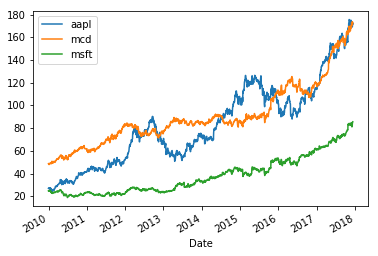

In [6]:
data.plot()

We can also find the method hist(), used to plot an histogram of the values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d6a560f10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1d66c0e750>]], dtype=object)

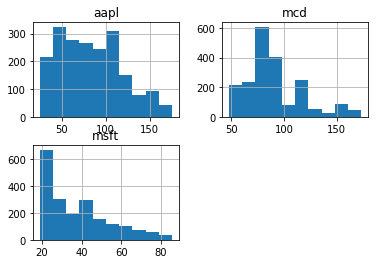

In [7]:
data.hist()

An interesting argument for the drawing methods such as plot() or hist() is the size you want. Just specify figsize = (length, height).

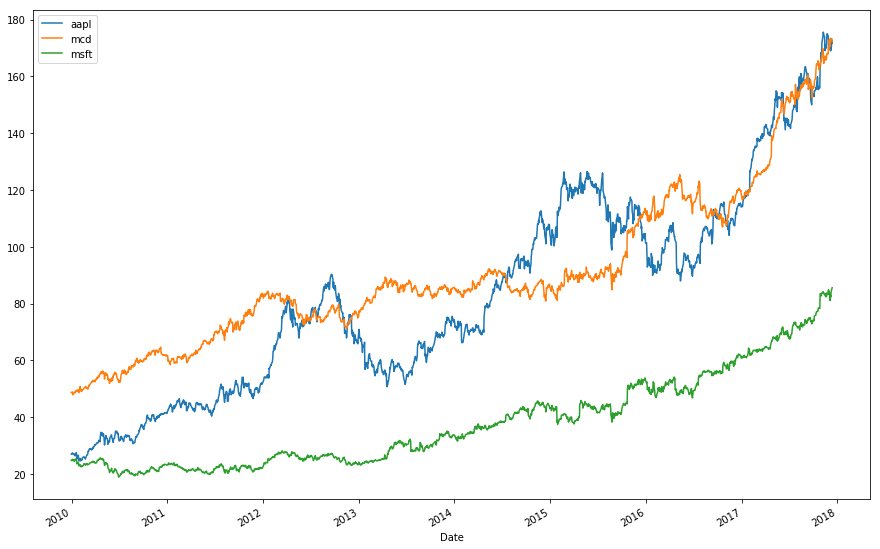

In [8]:
data.plot(figsize = (15, 10))

Another very useful method is describe(), that gives us summary statistics about the dataset.

In [9]:
data.describe()

,aapl,mcd,msft
count,2002.000000,2002.000000,2002.000000
mean,82.969177,90.602286,37.975089
std,36.165757,27.075306,16.375199
min,24.594294,47.893948,18.869308
25%,51.978415,74.335978,23.915018
50%,77.660160,85.109948,33.287571
75%,108.746813,108.687355,48.971917
max,175.608719,173.479996,85.580002


Exercise 1 : find a way to 
1. We have seen how to display the first entries of the DataFrame, using head(). Now let's try to display only the most recent prices (the last items of the dataframe). 
2. Let's plot them....
3. Now, let's plot the evolution of these equities during their last 30 quotes.

Solution (3 commands)

## Computing financial indicators

Let's go further. Some useful bt methods are rebase() and to_returns().

In [10]:
print data.rebase().head()

                  aapl         mcd        msft
Date                                          
2009-12-31  100.000000  100.000000  100.000000
2010-01-04  101.556482  100.544494  101.542005
2010-01-05  101.732063   99.775786  101.574811
2010-01-06  100.113875   98.414488  100.951441
2010-01-07   99.928801   99.135168   99.901579


In [11]:
print data.to_returns().head()

                aapl       mcd      msft
Date                                    
2009-12-31       NaN       NaN       NaN
2010-01-04  0.015565  0.005445  0.015420
2010-01-05  0.001729 -0.007645  0.000323
2010-01-06 -0.015906 -0.013644 -0.006137
2010-01-07 -0.001849  0.007323 -0.010400


The formula of to_returns() is simply (t1 / t0) - 1.

Exercise 2 : produce the two following plots :
- The price evolution during the last 30 quotes rebased to 100 at the beginning of the plot.
- The histogram of the returns of the three equities during last year (252 quotes).

Solution (2 commands)

Another interesting method available for the data object is corr(). It enables us to compute the correlation matrix of our securities. Let's compute the correlation matrix of the returns.

In [12]:
data.to_returns().corr()

,aapl,mcd,msft
aapl,1.000000,0.315740,0.396546
mcd,0.315740,1.000000,0.409766
msft,0.396546,0.409766,1.000000


Another method, plot_corr_heatmap, enable us to get a similar result but using a heatmap.

<module 'matplotlib.pyplot' from '/home/nicolas/.local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

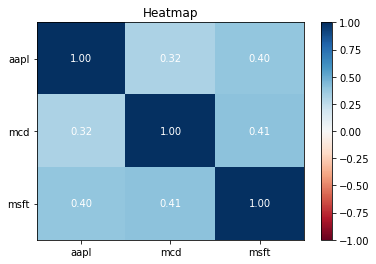

In [13]:
data.to_returns().plot_corr_heatmap()

Now, let's see how to display some more complex financial statistics about our data.

In [14]:
stats = data.calc_stats()
stats.display()

Stat                 aapl        mcd         msft
-------------------  ----------  ----------  ----------
Start                2009-12-31  2009-12-31  2009-12-31
End                  2017-12-12  2017-12-12  2017-12-12
Risk-free rate       0.00%       0.00%       0.00%

Total Return         536.24%     253.91%     245.54%
Daily Sharpe         1.05        1.14        0.81
Daily Sortino        1.49        1.66        1.17
CAGR                 26.21%      17.24%      16.88%
Max Drawdown         -43.80%     -15.50%     -26.37%
Calmar Ratio         0.60        1.11        0.64

MTD                  -0.09%      0.15%       1.68%
3m                   7.12%       10.83%      15.17%
6m                   18.96%      17.39%      23.92%
YTD                  50.63%      45.14%      40.80%
1Y                   53.98%      45.12%      40.73%
3Y (ann.)            18.23%      27.62%      25.28%
5Y (ann.)            19.78%      17.65%      29.12%
10Y (ann.)           26.21%      17.24%      16.88%
Since 

What does it mean ?

- Total Return: Total return on the period.
- Daily Sharpe: Daily Sharpe ratio

The Sharpe ratio : $$S(x) = \frac{R_x - r}{\sigma_x}$$
With $R_x$ being the investment return, $r$ being the riskfree rate and $\sigma_x$ being the standard deviation of the investment.
The Sharpe ratio measures the return you are receiving in comparison with the risk you are taking.
- Daily Sortino: Daily Sortino ratio

The Sortino ratio (as used in the bt package) is a variation of the Sharpe ratio, taking into account only the negative volatility. The formula is very similar :
$$S^{'}(x) = \frac{R_x - r}{\sigma^-_x}$$
With $R_x$ being the investment return, $r$ being the riskfree rate and $\sigma^-_x$ being the downside deviation of the investment.

- CAGR: Compound annual growth rate

The compound annual growth rate (CAGR) :
$${CAGR}(t_0,t_n) = \left( {V(t_n)/V(t_0)} \right)^\frac{1}{t_n-t_0} - 1$$
It is an easy way to have an idea of the "average" return during the period : taking the actual average of the annual returns is not as good, given that volatility can affect the results.

- Max Drawdown: Maximum decline of the equity
- Calmar Ratio: Ratio of the CAGR and the absolute value of the Max Drawdown

 
 
- Daily Mean (ann.): Daily average of return, times the number of trading periods in a year (252)
- Daily Vol (ann.): Same thing with the standard deviation
- Daily Skew: Usual measure of the asymmetry, daily average
- Daily Kurt: Usual measure of "tailedness", daily average
 
  
  
- MTD: The month to date return
- 3m: 3 months ago to date return
- 6m: 6 months
- YTD: The beginning of the year to date return
- 1Y: One year ago to date return
- 3Y: Etc.
- 5Y: Etc.
- 10Y: Be careful : these stats are limited by the data start date !
- Since Incep. (ann.): Same thing !

To get correct statistics (such as Sharpe and Sortino ratios), we have to specify the riskfree rate on the considered period. To estimate the riskfree rate, The Treasury Bonds rate is used. We will use the ticker symbol [IEF](http://eoddata.com/stockquote/NASDAQ/IEF.htm) to determine the riskfree rate.

In [15]:
riskfree =  bt.get('IEF', start='2010-01-01')
riskfree_rate = float(riskfree.calc_cagr())
print riskfree_rate

0.0443766599859


We can now display accurate statistics about our data.

In [16]:
stats.set_riskfree_rate(riskfree_rate)
stats.display()

Stat                 aapl        mcd         msft
-------------------  ----------  ----------  ----------
Start                2009-12-31  2009-12-31  2009-12-31
End                  2017-12-12  2017-12-12  2017-12-12
Risk-free rate       4.44%       4.44%       4.44%

Total Return         536.24%     253.91%     245.54%
Daily Sharpe         0.88        0.85        0.62
Daily Sortino        1.25        1.24        0.89
CAGR                 26.21%      17.24%      16.88%
Max Drawdown         -43.80%     -15.50%     -26.37%
Calmar Ratio         0.60        1.11        0.64

MTD                  -0.09%      0.15%       1.68%
3m                   7.12%       10.83%      15.17%
6m                   18.96%      17.39%      23.92%
YTD                  50.63%      45.14%      40.80%
1Y                   53.98%      45.12%      40.73%
3Y (ann.)            18.23%      27.62%      25.28%
5Y (ann.)            19.78%      17.65%      29.12%
10Y (ann.)           26.21%      17.24%      16.88%
Since 

Exercice 3:
- Plot the price evolution of General Electric and Ford since 2015.
- Display their financial indicators, with a correct riskfree rate.

Solution

## Designing automated strategies

You can establish strategies in bt in order to choose a portfolio of equities and to automatically ajust this portfolio given a determined strategy. To do so, we will use the bt.Strategy() object.

In [17]:
help(bt.Strategy)

Help on class Strategy in module bt.core:

class Strategy(StrategyBase)
 |  Strategy expands on the StrategyBase and incorporates Algos.
 |  
 |  Basically, a Strategy is built by passing in a set of algos. These algos
 |  will be placed in an Algo stack and the run function will call the stack.
 |  
 |  Furthermore, two class attributes are created to pass data between algos.
 |  perm for permanent data, temp for temporary data.
 |  
 |  Args:
 |      * name (str): Strategy name
 |      * algos (list): List of Algos to be passed into an AlgoStack
 |      * children (dict, list): Children - useful when you want to create
 |          strategies of strategies
 |  
 |  Attributes:
 |      * stack (AlgoStack): The stack
 |      * temp (dict): A dict containing temporary data - cleared on each call
 |          to run. This can be used to pass info to other algos.
 |      * perm (dict): Permanent data used to pass info from one algo to
 |          another. Not cleared on each pass.
 |  
 |  

As we can see, a strategy is a stack of algorithms that work one after the other, transmitting data to each other and / or stop signals. A more complete explanation can be found in the [official documentation](http://pmorissette.github.io/bt/algos.html).

A good structure for a stack of algorithm is the following one :
- frequency : which frequency should your strategy use ?
- selection: which securities should you choose ?
- weighting: how much weight should each of the selected securities have in the target portfolio?
- allocate: close out positions that are no longer needed and allocate capital to those that were selected and given target weights.

Let's take a practical example, making these choices :
- frequency : every month
- selection: all the securities available (in the dataframe)
- weighting: equal weight to all
- allocate.


In [18]:
s_equal_weights = bt.Strategy('Equal weights', 
                       [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

We then run a backtest to assess the efficiency of our automated trading strategy.

Equal weights
0% [############################# ] 100% | ETA: 00:00:00

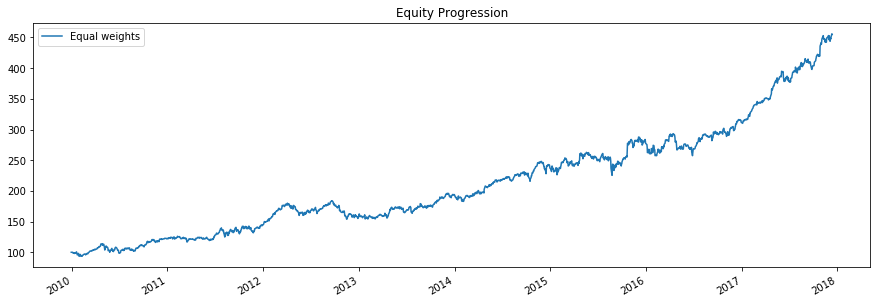

In [19]:
b_equal_weights = bt.Backtest(s_equal_weights, data)
result = bt.run(b_equal_weights)
result.plot()

We can display the same statistics we computed before, this time for the entire portfolio (and its monthly variations).

In [20]:
result.set_riskfree_rate(riskfree_rate)
result.display()

Stat                 Equal weights
-------------------  ---------------
Start                2009-12-30
End                  2017-12-12
Risk-free rate       4.44%

Total Return         354.91%
Daily Sharpe         1.00
Daily Sortino        1.40
CAGR                 20.99%
Max Drawdown         -16.32%
Calmar Ratio         1.29

MTD                  0.58%
3m                   11.06%
6m                   20.25%
YTD                  46.03%
1Y                   47.07%
3Y (ann.)            24.66%
5Y (ann.)            23.20%
10Y (ann.)           20.99%
Since Incep. (ann.)  20.99%

Daily Sharpe         1.00
Daily Sortino        1.40
Daily Mean (ann.)    20.36%
Daily Vol (ann.)     16.02%
Daily Skew           -0.09
Daily Kurt           2.96
Best Day             5.18%
Worst Day            -4.78%

Monthly Sharpe       1.07
Monthly Sortino      2.06
Monthly Mean (ann.)  20.16%
Monthly Vol (ann.)   14.84%
Monthly Skew         0.02
Monthly Kurt         -0.23
Best Month           13.72%
Worst Month  

We can plot the weight variations to have an idea of the algorithm decisions regarding our portfolio.

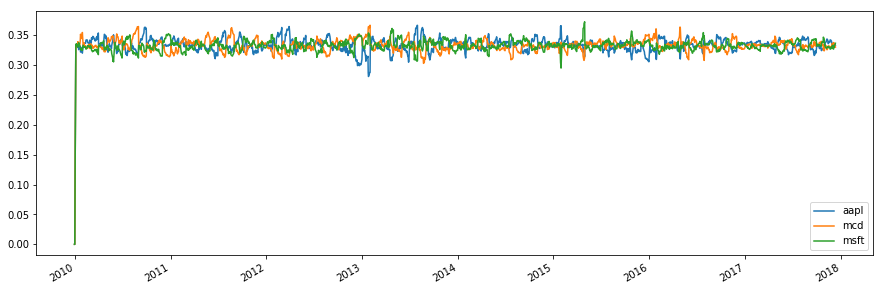

In [21]:
result.plot_security_weights()

Exercise 4. Let's compare this strategy to the Standard & Poor's 500 index.
1. Get the S&P index data from [Yahoo](https://finance.yahoo.com/).
2. Create a strategy that only buys S&P index.
3. Create a backtest on the data you fetched.
4. Run it !

Solution

In [22]:
data_spy = bt.get('spy', start='2010-01-01')

s_spy = bt.Strategy('S&P 500 only', 
                       [bt.algos.RunMonthly(),
                       bt.algos.SelectThese(['spy']),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])
                    
b_spy = bt.Backtest(s_spy, data_spy)

It is easier to run the two backtest at the same time in order to compare their results.

S&P 500 only
0% [############################# ] 100% | ETA: 00:00:00

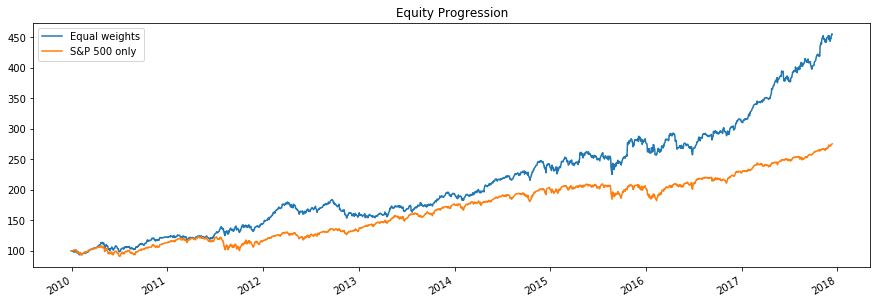

In [23]:
result = bt.run(b_equal_weights, b_spy)
result.plot()

## Selecting algos

### Frequency

The frequency can be just once using [RunOnce](http://pmorissette.github.io/bt/bt.html#bt.algos.RunOnce), a specific date using [RunOnDate](http://pmorissette.github.io/bt/bt.html#bt.algos.RunOnDate), or every n periods [RunEveryNPeriods](http://pmorissette.github.io/bt/bt.html#bt.algos.RunEveryNPeriods). The frequency can also be at the beginning of each day, week, month, quarter or year.
- [RunDaily](http://pmorissette.github.io/bt/bt.html#bt.algos.RunDaily)
- [RunWeekly](http://pmorissette.github.io/bt/bt.html#bt.algos.RunWeekly)
- Etc.

### Selection 

Let's see how we can select specific equities based on conditions. The algos we have are

- [SelectAll](http://pmorissette.github.io/bt/bt.html#bt.algos.SelectAll)
- SelectHasData
- SelectMomentum
- SelectN
- SelectRandomly
- SelectThese
- SelectWhere

We will use SelectRandomly to conduct a quick experiment. We will choose at random 10 securities among some of the most famous US companies, and invest in them equally

In [50]:
equity_list = ['AAPL', 'MCD', 'MSFT', 'TGT', 'GE', 'AMZN', 'T', 'UPS', 'GM', 'IBM', 'PEP', 'VZ', 'DIS', 'INTC', 'FORD', 'CMCSA', 'IEF', 'SPY']
data = bt.get(equity_list, start='2010-01-01')
print data.head()

                 aapl        mcd       msft        tgt         ge        amzn  \
Date                                                                            
2010-11-18  39.498138  63.102322  21.433971  45.230335  12.661540  164.169998   
2010-11-19  39.280430  63.597443  21.309553  46.039764  12.803629  164.820007   
2010-11-22  40.129494  63.501625  21.342730  45.598259  12.653646  170.389999   
2010-11-23  39.536552  63.094341  20.836742  45.164921  12.440515  168.199997   
2010-11-24  40.313889  63.469688  21.044117  46.808319  12.582601  177.250000   

                    t        ups         gm         ibm        pep         vz  \
Date                                                                            
2010-11-18  19.699944  55.649567  29.012630  120.067238  52.443890  23.540281   
2010-11-19  19.616821  56.416920  29.072027  120.641174  52.395306  23.497013   
2010-11-22  19.596048  56.155689  28.919292  120.923935  52.387203  23.432125   
2010-11-23  19.415949  55.6

Exercise 5 : 
1. Let's build our random strategy. It is the same strategy as before, but this time we use SelectRandomly in our algo stack. We only select 10 securities.
2. Compare this strategy to the S & P Index.

In [25]:
s_random = bt.Strategy('Random 10', 
                       [bt.algos.RunMonthly(),
                       bt.algos.SelectRandomly(10),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

b_random = bt.Backtest(s_random, data)

result = bt.run(b_random, b_spy)

Random 10
0% [############################# ] 100% | ETA: 00:00:00

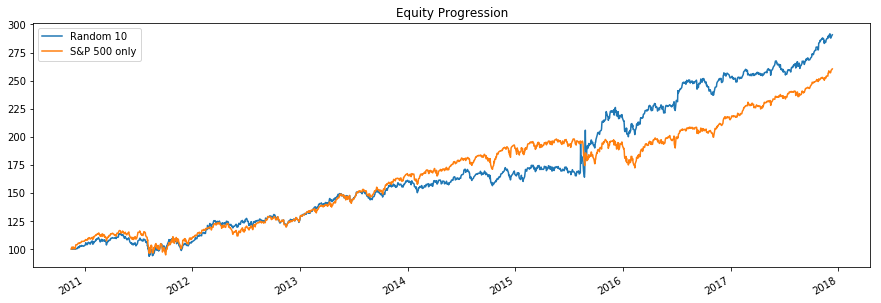

In [26]:
result.set_riskfree_rate(riskfree_rate)
result.plot()

In [27]:
result.display()

Stat                 Random 10    S&P 500 only
-------------------  -----------  --------------
Start                2010-11-17   2010-11-17
End                  2017-12-12   2017-12-12
Risk-free rate       4.44%        4.44%

Total Return         190.77%      160.40%
Daily Sharpe         0.74         0.72
Daily Sortino        1.04         0.92
CAGR                 16.30%       14.50%
Max Drawdown         -18.12%      -18.61%
Calmar Ratio         0.90         0.78

MTD                  0.17%        0.68%
3m                   8.82%        7.23%
6m                   10.06%       10.71%
YTD                  15.18%       21.06%
1Y                   14.01%       20.31%
3Y (ann.)            20.91%       12.19%
5Y (ann.)            18.06%       15.54%
10Y (ann.)           16.30%       14.50%
Since Incep. (ann.)  16.30%       14.50%

Daily Sharpe         0.74         0.72
Daily Sortino        1.04         0.92
Daily Mean (ann.)    16.44%       14.56%
Daily Vol (ann.)     16.35%       14.11%
Da

Our strategy is less efficient than the S & P, we did not beat the market.

Exercise : We want to code an algorithm that follow a simple strategy : only invest in the 5 securities that have the highest return, every month, among our list of famous US securities. Write the strategy, and compare it to the random strategy and the S & P index. Did we beat the market ?

### Weights

- WeighEqually WeighRandomly custom : WeighSpecified WeighTarget

Bt provides two ready-to-go strategies to weigh your portfolio.

- WeighInvVol, which weigh the assets proportionally to the inverse of their volatility. "This is a commonly used technique for risk parity portfolios. The least volatile elements receive the highest weight under this scheme."
- WeighERC, in which the weights are designed so each security is contributing in the amount to the portfolio overall volatility.
- WeighMeanVar, which is an implementation of Markowitz’s mean-variance optimization.

Let's try a strategy where we keep all the securities in data and we weigh them using the inverse of their volatility. Let's compare it the equal weight strategy.

In [139]:
s_inv = bt.Strategy('Inverse of Volatility', 
                       [bt.algos.RunAfterDays(56),
                       bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighInvVol(),
                       bt.algos.Rebalance()])

b_inv = bt.Backtest(s_inv, data)

Inverse of Volatility
0% [############################# ] 100% | ETA: 00:00:00

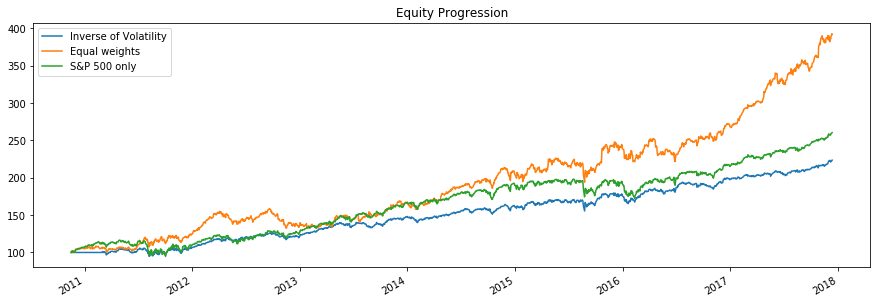

In [140]:
result = bt.run(b_inv, b_equal_weights, b_spy)
result.plot()

In [30]:
result.display()

Stat                 Inverse of Volatility    Equal weights    S&P 500 only
-------------------  -----------------------  ---------------  --------------
Start                2010-11-17               2010-11-17       2010-11-17
End                  2017-12-12               2017-12-12       2017-12-12
Risk-free rate       0.00%                    0.00%            0.00%

Total Return         133.54%                  291.74%          160.40%
Daily Sharpe         1.23                     1.31             1.03
Daily Sortino        1.65                     1.84             1.30
CAGR                 12.75%                   21.31%           14.50%
Max Drawdown         -10.14%                  -16.32%          -18.61%
Calmar Ratio         1.26                     1.31             0.78

MTD                  0.60%                    0.58%            0.68%
3m                   6.37%                    11.06%           7.23%
6m                   7.51%                    20.25%           10.71%
YTD

What can we conclude ?

Exercice : Create a strategy that will take all the securities and weight the securities according to Markowitz Mean-Variance portfolio theory. Compare it to the others.

Solution

## Custom strategies

As we have seen, there is two bt.algos that enable us to manually select and attribute weights :
- SelectWhere
- WeighTarget

They take as argument a DataFrame indicating 1 / 0 for SelectWhere and the weights for WeighTarget.

Let's start with SelectWhere. We need to give it a DataFrame 

In [31]:
print len(data)
selection = data > 100
print selection

1779
             aapl    mcd   msft    tgt     ge  amzn      t    ups     gm  \
Date                                                                       
2010-11-18  False  False  False  False  False  True  False  False  False   
2010-11-19  False  False  False  False  False  True  False  False  False   
2010-11-22  False  False  False  False  False  True  False  False  False   
2010-11-23  False  False  False  False  False  True  False  False  False   
2010-11-24  False  False  False  False  False  True  False  False  False   
2010-11-26  False  False  False  False  False  True  False  False  False   
2010-11-29  False  False  False  False  False  True  False  False  False   
2010-11-30  False  False  False  False  False  True  False  False  False   
2010-12-01  False  False  False  False  False  True  False  False  False   
2010-12-02  False  False  False  False  False  True  False  False  False   
2010-12-03  False  False  False  False  False  True  False  False  False   
2010-12

Let's c reate a strategy based on this boolean DataFrame:

Custom selection
0% [############################# ] 100% | ETA: 00:00:00

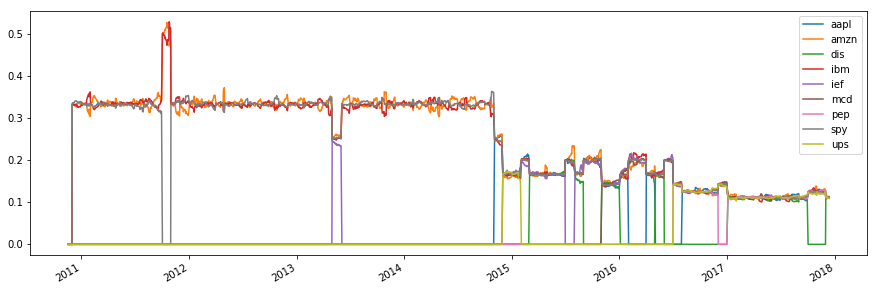

In [32]:
s_custom_selection = bt.Strategy('Custom selection', 
                       [bt.algos.RunMonthly(),
                       bt.algos.SelectWhere(selection),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

b_custom_selection = bt.Backtest(s_custom_selection, data)
result = bt.run(b_custom_selection)
result.plot_security_weights()

BT uses all the methods of [ffn](http://pmorissette.github.io). So we can use all the price methods to change our data and establish interesting conditions. For instance, let's establish the following strategiy : we want to invest in securities who are going up.

In [33]:
print data.to_returns().head(20)

                aapl       mcd      msft       tgt        ge      amzn  \
Date                                                                     
2010-11-18       NaN       NaN       NaN       NaN       NaN       NaN   
2010-11-19 -0.005512  0.007846 -0.005805  0.017896  0.011222  0.003959   
2010-11-22  0.021615 -0.001507  0.001557 -0.009590 -0.011714  0.033794   
2010-11-23 -0.014776 -0.006414 -0.023708 -0.009503 -0.016843 -0.012853   
2010-11-24  0.019661  0.005949  0.009952  0.036387  0.011421  0.053805   
2010-11-26  0.000635 -0.011827 -0.004730 -0.006987 -0.008783 -0.000282   
2010-11-29  0.005937  0.004235  0.002376 -0.009147  0.010759  0.012923   
2010-11-30 -0.018052  0.000511 -0.001976  0.010829 -0.008766 -0.022787   
2010-12-01  0.016873  0.012644  0.030879  0.018968  0.029691  0.006556   
2010-12-02  0.005531  0.001135  0.032642  0.028093  0.023313 -0.000113   
2010-12-03 -0.002232  0.004787  0.004834 -0.008885  0.005995 -0.004815   
2010-12-06  0.008537 -0.002256 -0.0066

In [55]:
print data.to_returns() > 0
selection = data.to_returns() > 0

             aapl    mcd   msft    tgt     ge   amzn      t    ups     gm  \
Date                                                                        
2010-11-18  False  False  False  False  False  False  False  False  False   
2010-11-19  False   True  False   True   True   True  False   True   True   
2010-11-22   True  False   True  False  False   True  False  False  False   
2010-11-23  False  False  False  False  False  False  False  False  False   
2010-11-24   True   True   True   True   True   True   True   True   True   
2010-11-26   True  False  False  False  False  False  False  False   True   
2010-11-29   True   True   True  False   True   True  False   True  False   
2010-11-30  False   True  False   True  False  False   True   True   True   
2010-12-01   True   True   True   True   True   True   True   True   True   
2010-12-02   True   True   True   True   True  False   True   True  False   
2010-12-03  False   True   True  False   True  False  False  False  False   

Custom selection
0% [############################# ] 100% | ETA: 00:00:00

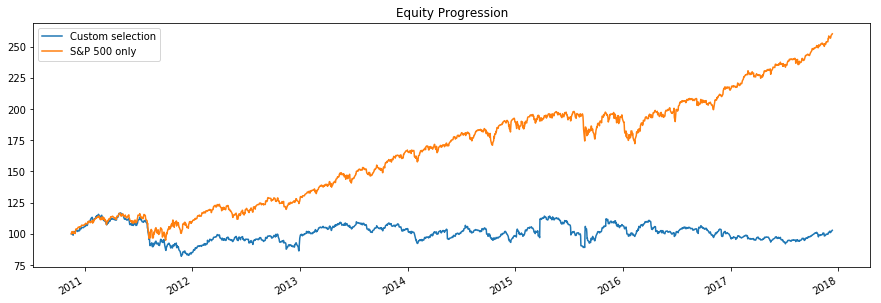

In [60]:
s_custom_selection = bt.Strategy('Custom selection', 
                       [bt.algos.RunDaily(),
                       bt.algos.SelectWhere(selection),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

b_custom_selection = bt.Backtest(s_custom_selection, data)
result = bt.run(b_custom_selection, b_spy)
result.plot()

Another possibility is to use the DataFrame method [rolling] to consider moving averages.

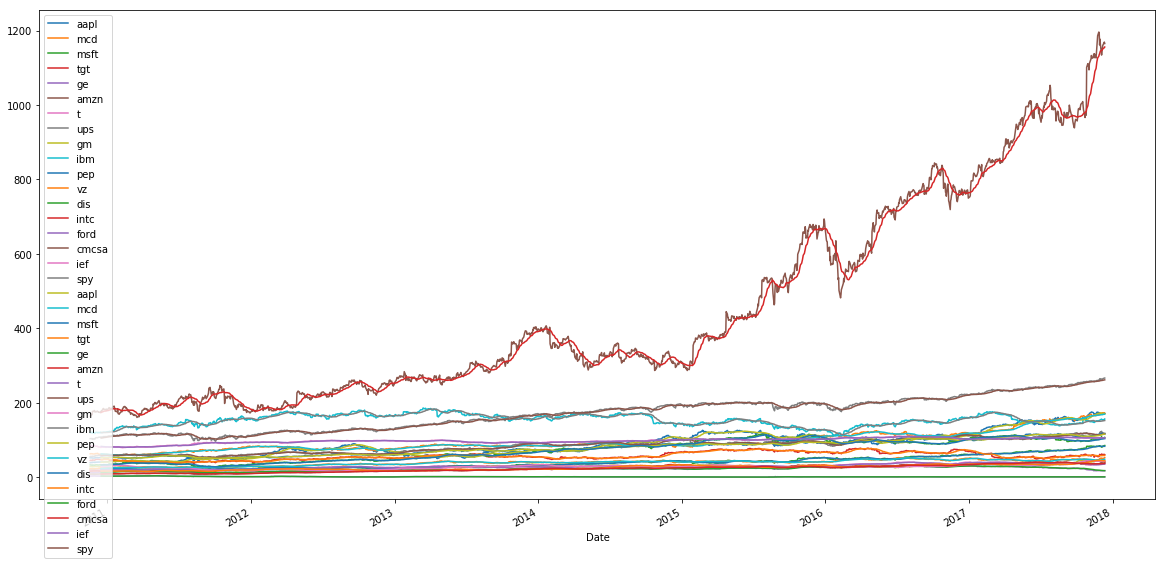

In [69]:
moving_average_data = data.rolling(20).mean()
bt.merge(data, moving_average_data).plot(figsize = (20, 10))

In [ ]:
selection = data > moving_average_data

Custom selection
0% [############################# ] 100% | ETA: 00:00:00

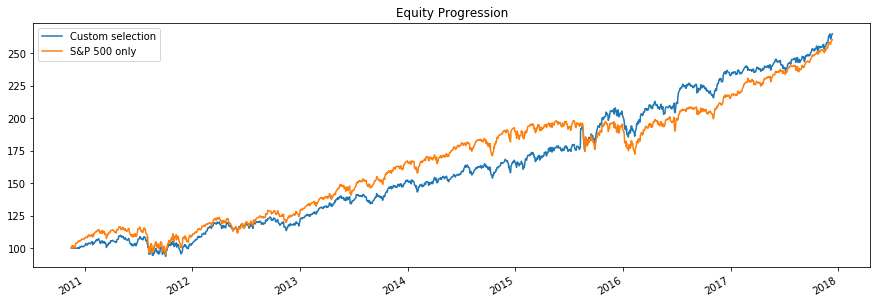

In [91]:
s_custom_selection = bt.Strategy('Custom selection', 
                       [bt.algos.RunDaily(),
                       bt.algos.SelectWhere(selection),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

b_custom_selection = bt.Backtest(s_custom_selection, data)
result = bt.run(b_custom_selection, b_spy)
result.plot()

In [90]:
std = data.rolling(10).std()
mean = data.rolling(10).mean()
selection = (std / mean) < 0.05
print selection

             aapl    mcd   msft    tgt     ge   amzn      t    ups     gm  \
Date                                                                        
2010-11-18  False  False  False  False  False  False  False  False  False   
2010-11-19  False  False  False  False  False  False  False  False  False   
2010-11-22  False  False  False  False  False  False  False  False  False   
2010-11-23  False  False  False  False  False  False  False  False  False   
2010-11-24  False  False  False  False  False  False  False  False  False   
2010-11-26  False  False  False  False  False  False  False  False  False   
2010-11-29  False  False  False  False  False  False  False  False  False   
2010-11-30  False  False  False  False  False  False  False  False  False   
2010-12-01  False  False  False  False  False  False  False  False  False   
2010-12-02   True   True   True   True   True   True   True   True   True   
2010-12-03   True   True   True   True   True   True   True   True   True   

Exercice (a bit difficult but you can do it...) : You evaluate the volatility of the securities before investing.
1. Compute the dataset with a daily standard deviation over the last 10 periods.
2. Compute the price mean over the last 10 periods, daily.
3. Invest only in equities whose ratio std / mean is below 5% (over the last 10 periods).

Ok, we can do exactly the same with weights. All we have to do is provide a DataFrame with custom weights. It is a bit more difficult though, because we have to make sure that all the weights sum up to 1. A little trick to transform any value in proportionate weight :

In [101]:
print data.head()

                 aapl        mcd       msft        tgt         ge        amzn  \
Date                                                                            
2010-11-18  39.498138  63.102322  21.433971  45.230335  12.661540  164.169998   
2010-11-19  39.280430  63.597443  21.309553  46.039764  12.803629  164.820007   
2010-11-22  40.129494  63.501625  21.342730  45.598259  12.653646  170.389999   
2010-11-23  39.536552  63.094341  20.836742  45.164921  12.440515  168.199997   
2010-11-24  40.313889  63.469688  21.044117  46.808319  12.582601  177.250000   

                    t        ups         gm         ibm        pep         vz  \
Date                                                                            
2010-11-18  19.699944  55.649567  29.012630  120.067238  52.443890  23.540281   
2010-11-19  19.616821  56.416920  29.072027  120.641174  52.395306  23.497013   
2010-11-22  19.596048  56.155689  28.919292  120.923935  52.387203  23.432125   
2010-11-23  19.415949  55.6

In [100]:
print data.div(data.sum(axis=1), axis=0).head()

                aapl       mcd      msft       tgt        ge      amzn  \
Date                                                                     
2010-11-18  0.044018  0.070324  0.023887  0.050406  0.014111  0.182957   
2010-11-19  0.043626  0.070634  0.023667  0.051134  0.014220  0.183055   
2010-11-22  0.044281  0.070071  0.023551  0.050316  0.013963  0.188018   
2010-11-23  0.044141  0.070442  0.023263  0.050425  0.013889  0.187789   
2010-11-24  0.044122  0.069465  0.023032  0.051229  0.013771  0.193992   

                   t       ups        gm       ibm       pep        vz  \
Date                                                                     
2010-11-18  0.021954  0.062018  0.032333  0.133808  0.058446  0.026234   
2010-11-19  0.021787  0.062659  0.032289  0.133989  0.058192  0.026097   
2010-11-22  0.021623  0.061965  0.031911  0.133434  0.057807  0.025856   
2010-11-23  0.021677  0.062121  0.031501  0.132955  0.057756  0.026073   
2010-11-24  0.021333  0.062174  0.031

Lets take std

In [122]:
std = data.to_returns().rolling(57).std()
inv_std = 1 / std
inv_std_weights = inv_std.div(inv_std.sum(axis=1), axis=0)
print inv_std_weights.tail()

                aapl       mcd      msft       tgt        ge      amzn  \
Date                                                                     
2017-12-06  0.043749  0.058916  0.041803  0.020349  0.026166  0.024887   
2017-12-07  0.043937  0.058754  0.041730  0.020394  0.026589  0.024997   
2017-12-08  0.043999  0.058899  0.040959  0.020422  0.026626  0.025064   
2017-12-11  0.044028  0.060306  0.040867  0.020407  0.026683  0.025050   
2017-12-12  0.044992  0.060241  0.041229  0.020441  0.026768  0.025108   

                   t       ups        gm       ibm       pep        vz  \
Date                                                                     
2017-12-06  0.034797  0.046744  0.034198  0.036563  0.068834  0.043058   
2017-12-07  0.034877  0.046239  0.034258  0.036508  0.065019  0.042943   
2017-12-08  0.035247  0.046410  0.034304  0.036494  0.065303  0.044400   
2017-12-11  0.035251  0.045968  0.034163  0.036605  0.065589  0.043823   
2017-12-12  0.033752  0.046055  0.034

Let's weight our portfolio following this weight matrix !

Custom weighting
0% [############################# ] 100% | ETA: 00:00:00

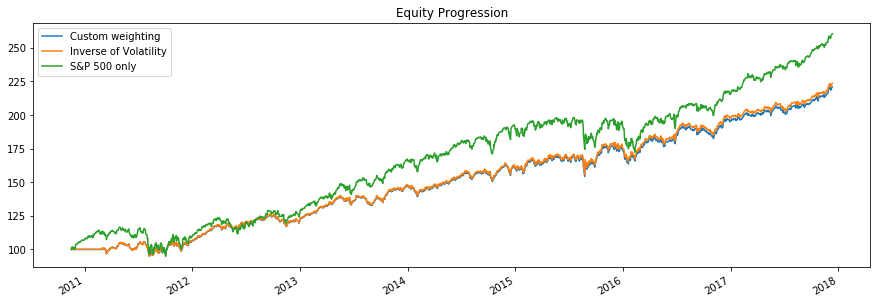

In [141]:
s_custom_weighting = bt.Strategy('Custom weighting', 
                       [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighTarget(inv_std_weights),
                       bt.algos.Rebalance()])

b_custom_weighting = bt.Backtest(s_custom_weighting, data)
result = bt.run(b_custom_weighting, b_inv, b_spy)
result.plot()

We manage to reproduce manually the WeighInv algo.

Exercise : Let's try the opposite strategy ! Invest more in securities that are more volatile !

## Strategies of strategies

Bt is built waround the idea of building [trees of strategies](http://pmorissette.github.io/bt/tree.html). We can indicate other strategy to a strategy. Let's see an example !

Both
0% [############################# ] 100% | ETA: 00:00:00

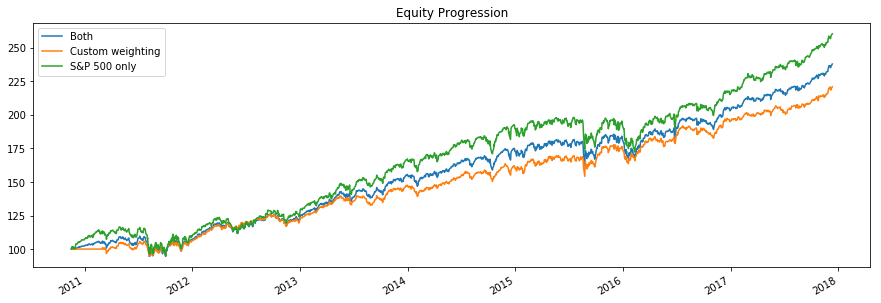

In [143]:
s_both = bt.Strategy('Both', [bt.algos.RunMonthly(),
                                bt.algos.SelectAll(),
                                bt.algos.WeighEqually(),
                                bt.algos.Rebalance()],
                    [s_custom_weighting, s_spy])
b_both = bt.Backtest(s_both, data)
result = bt.run(b_both, b_custom_weighting, b_spy)
result.plot()

This opens a lot of possibility ! We can have portfolios of a lot of different strategies, and we can design a strategy to select / weight these strategies depending on their performance or their volatility.

## Professional data

We will use a more serious data provider, [Quandl](https://www.quandl.com/). Quandl has its own Python package to make fetching data easy. (If you are on your own Python notebook / IDE, please run `pip install quandl`.

In [35]:
import quandl

A full documentation on how to use quandl is available [here](https://docs.quandl.com/docs).

As all data providers, Quandl needs you to register, and will give you an API key. This is a key you put in your code (Python, R, or any other language). It is used to open the access to the data, and QUadl uses it to monitor your use. A free account is limited. If you want to access top notch data (such as real time data), you will need to pay. we will use a free account.

Please click on SIGN IN on the top-right corner and create an account. Quandl will give you your API key straightaway : please copy and paste it below.

In [36]:
my_api_key = 'vV5n2kkCHA3mm-zKCwBQ'

Let's tell quandl our api key.

In [37]:
quandl.ApiConfig.api_key = my_api_key

Quandl has a method similar to bt.get(). It is quandl.get():

In [38]:
help(quandl.get)

Help on function get in module quandl.get:

get(dataset, **kwargs)
    Return dataframe of requested dataset from Quandl.
    :param dataset: str or list, depending on single dataset usage or multiset usage
            Dataset codes are available on the Quandl website
    :param str api_key: Downloads are limited to 50 unless api_key is specified
    :param str start_date, end_date: Optional datefilers, otherwise entire
           dataset is returned
    :param str collapse: Options are daily, weekly, monthly, quarterly, annual
    :param str transform: options are diff, rdiff, cumul, and normalize
    :param int rows: Number of rows which will be returned
    :param str order: options are asc, desc. Default: `asc`
    :param str returns: specify what format you wish your dataset returned as,
        either `numpy` for a numpy ndarray or `pandas`. Default: `pandas`
    :returns: :class:`pandas.DataFrame` or :class:`numpy.ndarray`
    Note that Pandas expects timeseries data to be sorte

A more complete documentation can be found [here](https://docs.quandl.com/docs/parameters-2#section-times-series-parameters). It is pretty straightforward. We use it almost the same way we use bt.get(), except quandl has a lot a databases, so we have to specify the database before the ticker symbol. WIKI is the name of the database 

In [39]:
data = quandl.get('WIKI/AAPL', start_date = '2016-01-01')
print data[['Close']].head()

             Close
Date              
2016-01-04  105.35
2016-01-05  102.71
2016-01-06  100.70
2016-01-07   96.45
2016-01-08   96.96


To keep things simple, we are only interested in the Close price. In the [documentation](https://docs.quandl.com/docs/parameters-2#section-times-series-parameters), we can see that the `column_index` option can be used to select the columns. Here we are only interested in the fourth column.

In [40]:
data = quandl.get('WIKI/AAPL', start_date = '2016-01-01', column_index = 4)
print data.head()

             Close
Date              
2016-01-04  105.35
2016-01-05  102.71
2016-01-06  100.70
2016-01-07   96.45
2016-01-08   96.96


Perfect ! (Another solution would have been to select the column using `data[['Close']]`)

Let's try with our list of equities, `equity_list`.

In [41]:
print equity_list

['AAPL', 'MCD', 'MSFT', 'TGT', 'GE', 'AMZN', 'T', 'UPS', 'GM', 'IBM', 'PEP', 'VZ', 'DIS', 'INTC', 'FORD', 'CMCSA', 'IEF', 'SPY']


In [42]:
wiki_equity_list = []
for ticker in equity_list:
    wiki_equity_list.append('WIKI/' + ticker)
print wiki_equity_list

['WIKI/AAPL', 'WIKI/MCD', 'WIKI/MSFT', 'WIKI/TGT', 'WIKI/GE', 'WIKI/AMZN', 'WIKI/T', 'WIKI/UPS', 'WIKI/GM', 'WIKI/IBM', 'WIKI/PEP', 'WIKI/VZ', 'WIKI/DIS', 'WIKI/INTC', 'WIKI/FORD', 'WIKI/CMCSA', 'WIKI/IEF', 'WIKI/SPY']


In [43]:
data = quandl.get(wiki_equity_list, start_date = '2016-01-01', column_index = 4)
print data.head()

            WIKI/AAPL - Close  WIKI/MCD - Close  WIKI/MSFT - Close  \
Date                                                                 
2016-01-04             105.35            117.58              54.80   
2016-01-05             102.71            119.20              55.05   
2016-01-06             100.70            118.40              54.05   
2016-01-07              96.45            115.66              52.17   
2016-01-08              96.96            115.48              52.33   

            WIKI/TGT - Close  WIKI/GE - Close  WIKI/AMZN - Close  \
Date                                                               
2016-01-04             73.55            30.71             636.99   
2016-01-05             74.84            30.74             633.79   
2016-01-06             74.08            30.25             632.65   
2016-01-07             73.88            28.97             607.94   
2016-01-08             71.38            28.45             607.05   

            WIKI/T - Close  WIKI

Parfait !

In [44]:
big_list = []
import csv
with open('WIKI-datasets-codes.csv', 'rb') as csvfile:
    spamreader = csv.reader(csvfile)
    for row in spamreader:
        big_list.append(row[0])

big_list.pop(1)
big_list.pop(1)
print big_list

['WIKI/AAPL', 'WIKI/ABC', 'WIKI/ABT', 'WIKI/ACE', 'WIKI/ACN', 'WIKI/AGN', 'WIKI/ADBE', 'WIKI/ADI', 'WIKI/ADM', 'WIKI/ADP', 'WIKI/ADS', 'WIKI/ADSK', 'WIKI/ADT', 'WIKI/AEE', 'WIKI/AEP', 'WIKI/AES', 'WIKI/AET', 'WIKI/AFL', 'WIKI/AIG', 'WIKI/AIV', 'WIKI/AIZ', 'WIKI/AKAM', 'WIKI/ALL', 'WIKI/ALLE', 'WIKI/ALTR', 'WIKI/ALXN', 'WIKI/AMAT', 'WIKI/AME', 'WIKI/AMGN', 'WIKI/AMP', 'WIKI/AMT', 'WIKI/AMZN', 'WIKI/A', 'WIKI/AN', 'WIKI/AON', 'WIKI/APA', 'WIKI/APC', 'WIKI/APD', 'WIKI/APH', 'WIKI/ARG', 'WIKI/ATI', 'WIKI/AVB', 'WIKI/AVP', 'WIKI/AVY', 'WIKI/AXP', 'WIKI/AZO', 'WIKI/BA', 'WIKI/BAC', 'WIKI/BAX', 'WIKI/BBBY', 'WIKI/BBT', 'WIKI/BBY', 'WIKI/BCR', 'WIKI/BDX', 'WIKI/BEAM', 'WIKI/BEN', 'WIKI/BF_B', 'WIKI/BHI', 'WIKI/BIIB', 'WIKI/BK', 'WIKI/BLK', 'WIKI/BLL', 'WIKI/BMS', 'WIKI/BMY', 'WIKI/BRCM', 'WIKI/BRK_B', 'WIKI/BSX', 'WIKI/BTU', 'WIKI/BWA', 'WIKI/BXP', 'WIKI/C', 'WIKI/CA', 'WIKI/CAG', 'WIKI/CAH', 'WIKI/CAM', 'WIKI/CAT', 'WIKI/CB', 'WIKI/CBG', 'WIKI/CBS', 'WIKI/CCE', 'WIKI/CCI', 'WIKI/CCL', 'WIKI/C

In [45]:
data = quandl.get(big_list[:50], start_date = '2016-05-01', column_index = 4)
print data.head()

            WIKI/AAPL - Close  WIKI/ABC - Close  WIKI/ABT - Close  \
Date                                                                
2016-05-02              93.64             85.23             38.85   
2016-05-03              95.18             85.48             38.55   
2016-05-04              94.19             84.29             38.10   
2016-05-05              93.24             78.00             38.50   
2016-05-06              92.72             76.52             37.97   

           WIKI/ACE - Close  WIKI/ACN - Close  WIKI/AGN - Close  \
Date                                                              
2016-05-02              NaN            114.40            218.11   
2016-05-03              NaN            113.30            214.82   
2016-05-04              NaN            113.55            214.62   
2016-05-05              NaN            114.08            210.34   
2016-05-06              NaN            115.55            201.65   

            WIKI/ADBE - Close  WIKI/ADI - Clos

Let's clean the missing data.

In [46]:
data.dropna(axis=1, how='all', inplace=True)
data.dropna(axis=0, how='all', inplace=True)
print data.head()

            WIKI/AAPL - Close  WIKI/ABC - Close  WIKI/ABT - Close  \
Date                                                                
2016-05-02              93.64             85.23             38.85   
2016-05-03              95.18             85.48             38.55   
2016-05-04              94.19             84.29             38.10   
2016-05-05              93.24             78.00             38.50   
2016-05-06              92.72             76.52             37.97   

            WIKI/ACN - Close  WIKI/AGN - Close  WIKI/ADBE - Close  \
Date                                                                
2016-05-02            114.40            218.11              94.90   
2016-05-03            113.30            214.82              93.66   
2016-05-04            113.55            214.62              92.94   
2016-05-05            114.08            210.34              93.50   
2016-05-06            115.55            201.65              94.30   

            WIKI/ADI - Close  WI

Best 10
0% [############################# ] 100% | ETA: 00:00:00

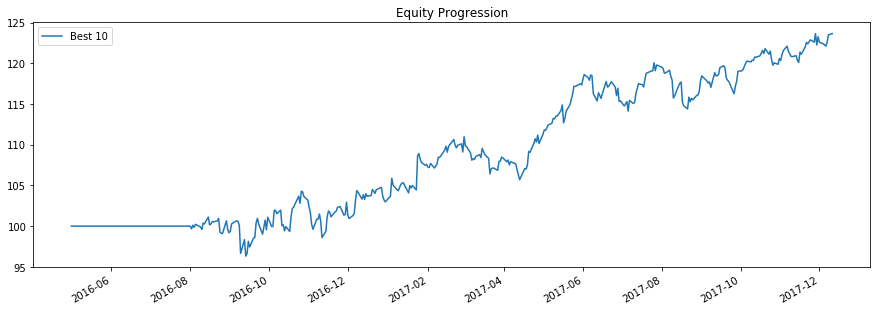

In [47]:
s1 = bt.Strategy('Best 10', 
                       [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.SelectMomentum(10, lookback = pd.DateOffset(months=2)),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])
best10 = bt.Backtest(s1, data)
result = bt.run(best10)
result.plot()

# Case study (to submit)

Choose any data on any company from any market, using Quandl.

Imagine we are the first of January, 2016.

Choose a strategy. Run a backtest on it. 

Then test the strategy on year 2017. Did you beat the market ? Why ? What would you change ? 